In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cufflinks
import ipywidgets
import chart_studio
import seaborn as sns
sns.set()

In [2]:
train_data = pd.read_csv("C:/Users/SHRADDHA/Desktop/Data_Train (1).csv")


In [3]:
pd.set_option('display.max_columns', None)


In [4]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
3,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
4,SpiceJet,24-06-2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [5]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6828 entries, 0 to 6827
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          6828 non-null   object
 1   Date_of_Journey  6828 non-null   object
 2   Source           6828 non-null   object
 3   Destination      6828 non-null   object
 4   Route            6827 non-null   object
 5   Dep_Time         6828 non-null   object
 6   Arrival_Time     6828 non-null   object
 7   Duration         6828 non-null   object
 8   Total_Stops      6827 non-null   object
 9   Additional_Info  6828 non-null   object
 10  Price            6828 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 586.9+ KB


In [6]:
train_data["Duration"].value_counts()


2h 50m     550
2h 35m     329
2h 45m     294
1h 30m     264
2h 55m     239
          ... 
21h 40m      1
25h          1
11h 25m      1
11h 55m      1
23h 45m      1
Name: Duration, Length: 310, dtype: int64

In [7]:
train_data.dropna(inplace = True)


In [8]:
train_data.isnull().sum()


Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

EDA
From description we can see that Date_of_Journey is a object data type,\ Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

**.dt.day method will extract only day of that date**\ **.dt.month method will extract only month of that date**

In [ ]:
train_data["Journey_day"] = pd.to_datetime(train_data.Date_of_Journey, format="%d/%m/%Y").dt.day


In [ ]:
train_data["Journey_month"] = pd.to_datetime(train_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month


In [10]:
train_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR ? DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897
1,Air India,01-05-2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
3,IndiGo,01-03-2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
4,SpiceJet,24-06-2019,Kolkata,Banglore,CCU ? BLR,09:00,11:25,2h 25m,non-stop,No info,3873


In [11]:
# Since we have converted Date_of_Journey column into integers, Now we can drop as it is of no use.

train_data.drop(["Date_of_Journey"], axis = 1, inplace = True)


In [12]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
train_data["Dep_hour"] = pd.to_datetime(train_data["Dep_Time"]).dt.hour

# Extracting Minutes
train_data["Dep_min"] = pd.to_datetime(train_data["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
train_data.drop(["Dep_Time"], axis = 1, inplace = True)


In [13]:
train_data.head()


,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22-03-2022 01:10,2h 50m,non-stop,No info,3897,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,13:15,7h 25m,2 stops,No info,7662,5,50
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,23:30,5h 25m,1 stop,No info,6218,18,5
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,21:35,4h 45m,1 stop,No info,13302,16,50
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,11:25,2h 25m,non-stop,No info,3873,9,0


In [14]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
train_data["Arrival_hour"] = pd.to_datetime(train_data.Arrival_Time).dt.hour

# Extracting Minutes
train_data["Arrival_min"] = pd.to_datetime(train_data.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
train_data.drop(["Arrival_Time"], axis = 1, inplace = True)


In [15]:
train_data.head()


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,2 stops,No info,7662,5,50,13,15
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,1 stop,No info,6218,18,5,23,30
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,1 stop,No info,13302,16,50,21,35
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,2h 25m,non-stop,No info,3873,9,0,11,25


In [16]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration


In [17]:
# Adding duration_hours and duration_mins list to train_data dataframe

train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins


In [18]:
train_data.drop(["Duration"], axis = 1, inplace = True)


In [19]:
train_data.head()


,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR ? DEL,non-stop,No info,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,2 stops,No info,7662,5,50,13,15,7,25
2,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,1 stop,No info,6218,18,5,23,30,5,25
3,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,1 stop,No info,13302,16,50,21,35,4,45
4,SpiceJet,Kolkata,Banglore,CCU ? BLR,non-stop,No info,3873,9,0,11,25,2,25


Handling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order --> **OneHotEncoder** is used in this case
**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case


In [29]:
train_data.pivot(columns='Airline', values='Price').iplot(
kind='box',
yTitle='Airline',
title='Airline by price')

In [30]:
train_data['Airline'].iplot(kind='hist', xTitle='Airline',
 yTitle='Frequency', title='Airline Distribution by Frequency')

In [31]:
train_data["Airline"].value_counts()


IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [32]:
Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [33]:
train_data["Source"].value_counts()

Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

In [1]:
#Importing plotly express for interactive graphs
import plotly.express as px
fig = px.scatter(train_data, x="Price", y="Airline", color="Source")
fig.show()

NameError: name 'train_data' is not defined

In [ ]:
# Standard plotly imports
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
#Using plotly + cufflinks in offline mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

In [27]:
train_data['Duration_hours'].iplot(kind='hist', xTitle='Airline', yTitle='Flight Duration', title='Airline Distribution by Duration')

In [36]:
#Creating the interactive dashboard
from ipywidgets import interact
def create_fare_plot(col = train_data.drop(['Price', 'Airline'], axis =1).columns):
    sns.barplot(data = train_data, x = col, y ='Price')
    plt.title(f'Mean Bar Plot of the AIRLINE VOLUME grouped by the {col}')

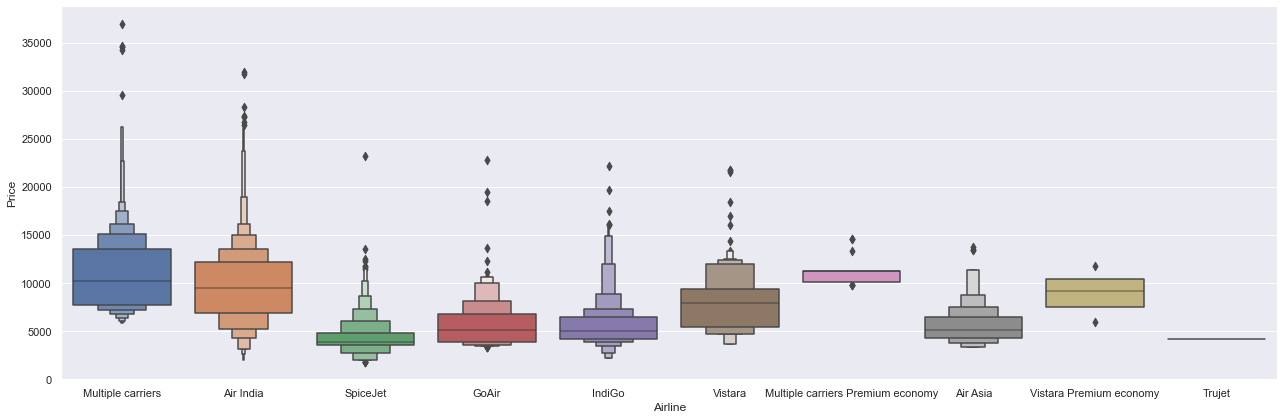

In [37]:
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

In [38]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = train_data[["Airline"]]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()


,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0


In [39]:
train_data["Source"].value_counts()


Delhi       2948
Kolkata     1615
Banglore    1405
Mumbai       478
Chennai      381
Name: Source, dtype: int64

In [40]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = train_data[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()


,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,0
4,0,0,1,0


In [41]:
train_data["Destination"].value_counts()


Cochin       2948
Banglore     1615
Delhi         895
New Delhi     510
Hyderabad     478
Kolkata       381
Name: Destination, dtype: int64

In [42]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()


,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,1
4,0,0,0,0,0


In [43]:
train_data["Route"]


0                   BLR ? DEL
1       CCU ? IXR ? BBI ? BLR
2             CCU ? NAG ? BLR
3             BLR ? NAG ? DEL
4                   CCU ? BLR
                ...          
6823                BLR ? DEL
6824                CCU ? BLR
6825                CCU ? BLR
6826                BLR ? DEL
6827    DEL ? GOI ? BOM ? COK
Name: Route, Length: 6827, dtype: object

In [44]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)


In [45]:
train_data["Total_Stops"].value_counts()


1 stop      3086
non-stop    2868
2 stops      827
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [46]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)


In [47]:
train_data.head()


,Airline,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,7,25
2,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,5,25
3,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,45
4,SpiceJet,Kolkata,Banglore,0,3873,9,0,11,25,2,25


In [48]:
# Concatenate dataframe --> train_data + Airline + Source + Destination

data_train = pd.concat([train_data, Airline, Source, Destination], axis = 1)


In [49]:
data_train.head()


,Airline,Source,Destination,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,IndiGo,Kolkata,Banglore,1,6218,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,IndiGo,Banglore,New Delhi,1,13302,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,SpiceJet,Kolkata,Banglore,0,3873,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [50]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)


In [51]:
data_train.head()


,Total_Stops,Price,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,6218,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,13302,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,3873,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [52]:
data_train.shape


(6827, 26)

# Test set


In [53]:
test_data = pd.read_csv("C:/Users/SHRADDHA/Desktop/Test_set.csv")


In [54]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
1,Multiple carriers,21-05-2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
2,Air Asia,24-06-2019,Banglore,Delhi,BLR ? DEL,23:55,25-06-2022 02:45,2h 50m,non-stop,No info
3,Air India,12-03-2019,Banglore,New Delhi,BLR ? TRV ? DEL,07:30,22:35,15h 5m,1 stop,No info
4,IndiGo,01-05-2019,Kolkata,Banglore,CCU ? HYD ? BLR,15:15,20:30,5h 15m,1 stop,No info


In [55]:
# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1772 entries, 0 to 1771
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          1772 non-null   object
 1   Date_of_Journey  1772 non-null   object
 2   Source           1772 non-null   object
 3   Destination      1772 non-null   object
 4   Route            1772 non-null   object
 5   Dep_Time         1772 non-null   object
 6   Arrival_Time     1772 non-null   object
 7   Duration         1772 non-null   object
 8   Total_Stops      1772 non-null   object
 9   Additional_Info  1772 non-null   object
dtypes: object(10)
memory usage: 138.6+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

ValueError: time data '12-05-2019' does not match format '%d/%m/%Y' (match)

In [57]:
test_data.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,12-05-2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
1,Multiple carriers,21-05-2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
2,Air Asia,24-06-2019,Banglore,Delhi,BLR ? DEL,23:55,25-06-2022 02:45,2h 50m,non-stop,No info
3,Air India,12-03-2019,Banglore,New Delhi,BLR ? TRV ? DEL,07:30,22:35,15h 5m,1 stop,No info
4,IndiGo,01-05-2019,Kolkata,Banglore,CCU ? HYD ? BLR,15:15,20:30,5h 15m,1 stop,No info


# Feature Selection
Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

**heatmap**
**feature_importance_**
**SelectKBest**


In [58]:
data_train.shape


(6827, 26)

In [59]:
data_train.columns


Index(['Total_Stops', 'Price', 'Dep_hour', 'Dep_min', 'Arrival_hour',
       'Arrival_min', 'Duration_hours', 'Duration_mins', 'Airline_Air India',
       'Airline_GoAir', 'Airline_IndiGo', 'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [61]:
X = data_train.loc[:, ['Total_Stops',  'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()


,Total_Stops,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,1,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,9,0,11,25,2,25,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0


In [62]:
y = data_train.iloc[:, 1]
y.head()


0     3897
1     7662
2     6218
3    13302
4     3873
Name: Price, dtype: int64

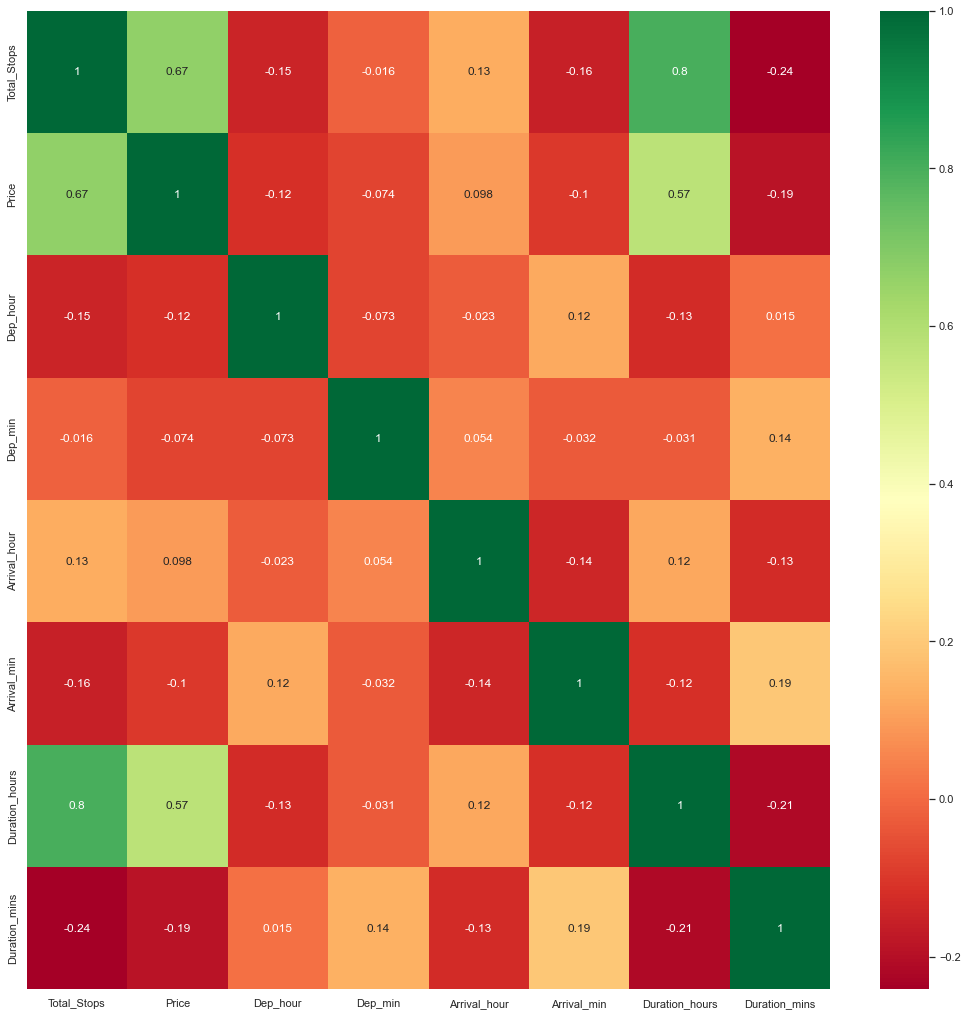

In [63]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()


In [64]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)


ExtraTreesRegressor()

In [65]:
print(selection.feature_importances_)


[3.18923730e-01 4.45178712e-02 4.34400600e-02 3.69284292e-02
 4.54833457e-02 1.88728723e-01 3.58545059e-02 4.50328386e-02
 3.77227347e-03 2.20947553e-02 6.36563709e-02 2.33049171e-03
 7.54384785e-03 1.36849285e-04 1.41756200e-02 3.63794165e-04
 8.63880442e-04 4.22808512e-02 4.95409566e-03 7.33823771e-03
 3.50365940e-02 2.42750175e-03 5.25346403e-03 6.96595609e-04
 2.81652736e-02]


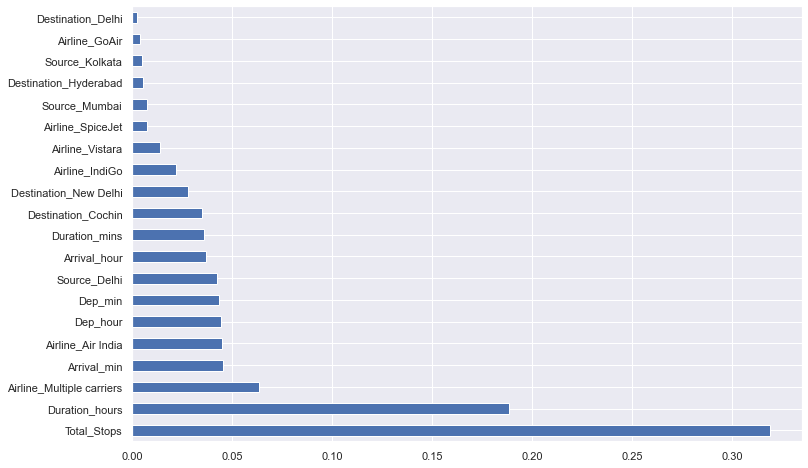

In [66]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# Fitting model using Random Forest

1. Split dataset into train and test set in order to prediction w.r.t X_test
2. If needed do scaling of data
      Scaling is not done in Random forest
3. Import model
4. Fit the data
5. Predict w.r.t X_test
6. In regression check RSME Score
7. Plot graph


In [67]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [72]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)


RandomForestRegressor()

In [73]:
y_pred = reg_rf.predict(X_test)


In [74]:
reg_rf.score(X_train, y_train)


0.805405567483515

In [75]:
reg_rf.score(X_test, y_test)


0.6751541607091158

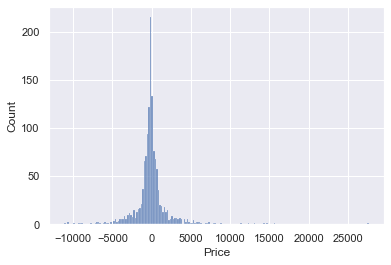

In [77]:
sns.histplot(y_test-y_pred)
plt.show()


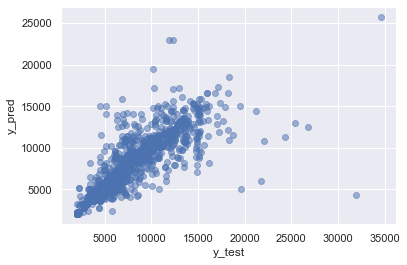

In [78]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [79]:
from sklearn import metrics


In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


MAE: 1173.0777111171587
MSE: 4785113.73469132
RMSE: 2187.4902821935734


In [81]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))


0.05935018453327277

In [82]:
metrics.r2_score(y_test, y_pred)


0.6751541607091158


# Hyperparameter Tuning
1. Choose following method for hyperparameter tuning
       RandomizedSearchCV --> Fast
       GridSearchCV
2. Assign hyperparameters in form of dictionery
3. Fit the model
4. Check best paramters and best score



In [83]:
from sklearn.model_selection import RandomizedSearchCV


In [84]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]


In [ ]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}


In [96]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2)

In [98]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   5.2s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   5.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   5.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   5.0s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=2, min_samples_split=100, n_estimators=1200; total time=   5.2s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.4s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=100, n_estimators=800; total time=   1.3s
[CV] END max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [99]:
rf_random.best_params_


{'n_estimators': 1000,
 'min_samples_split': 15,
 'min_samples_leaf': 5,
 'max_features': 'sqrt',
 'max_depth': 25}

In [100]:
prediction = rf_random.predict(X_test)


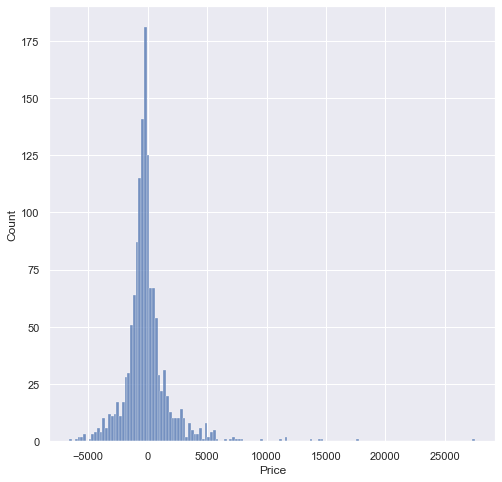

In [101]:
plt.figure(figsize = (8,8))
sns.histplot(y_test-prediction)
plt.show()


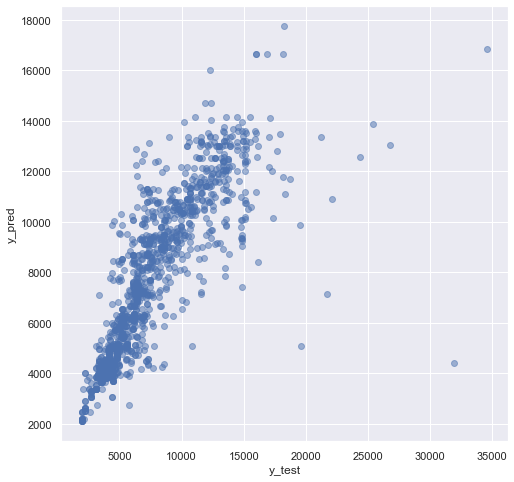

In [102]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()


In [103]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1222.8236177655951
MSE: 4425097.671692354
RMSE: 2103.591612384009


# SAVE THE MODEL AND USE IT AGAIN


In [104]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)


In [106]:
model = open('flight_rf.pkl','rb')
forest = pickle.load(model)


In [107]:
y_prediction = forest.predict(X_test)


In [108]:
metrics.r2_score(y_test, y_prediction)


0.6751541607091158